<a href="https://colab.research.google.com/github/zahriha/capstone_Xplisit/blob/main/ML/main22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os
import zipfile
import random
import tensorflow as tf
import shutil
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from shutil import copyfile
from os import getcwd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg



In [6]:
path_nails = f"/content/nail diseases.zip"

local_zip = path_nails
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:


print(len(os.listdir("/content/nail diseases/aloperia areata")))
print(len(os.listdir("/content/nail diseases/beau's lines")))
print(len(os.listdir("/content/nail diseases/bluish nail")))
print(len(os.listdir("/content/nail diseases/clubbing")))
print(len(os.listdir("/content/nail diseases/darier's disease")))
print(len(os.listdir("/content/nail diseases/eczema")))
print(len(os.listdir("/content/nail diseases/koilonychia")))
print(len(os.listdir("/content/nail diseases/leukonychia")))
print(len(os.listdir("/content/nail diseases/lindsay's nails")))
print(len(os.listdir("/content/nail diseases/muehrck-e's lines")))
print(len(os.listdir("/content/nail diseases/onycholycis")))
print(len(os.listdir("/content/nail diseases/pale nail")))
print(len(os.listdir("/content/nail diseases/red lunula")))
print(len(os.listdir("/content/nail diseases/splinter hemmorrage")))
print(len(os.listdir("/content/nail diseases/terry's nail")))
print(len(os.listdir("/content/nail diseases/white nail")))
print(len(os.listdir("/content/nail diseases/yellow nails")))


47
42
50
40
47
45
38
31
38
33
50
35
15
62
36
19
27


In [12]:
import os
import zipfile


try:
    os.makedirs("/content/Data/training")
    os.makedirs("/content/Data/testing")
    os.makedirs("/content/Data/training/aloperia areata")
    os.makedirs("/content/Data/training/beau's lines")
    os.makedirs("/content/Data/training/bluish nail")
    os.makedirs("/content/Data/training/clubbing")
    os.makedirs("/content/Data/training/darier's disease")
    os.makedirs("/content/Data/training/eczema")
    os.makedirs("/content/Data/training/lindsay's nails")
    os.makedirs("/content/Data/training/koilonychia")
    os.makedirs("/content/Data/training/leukonychia")
    os.makedirs("/content/Data/training/muehrck-e's lines")
    os.makedirs("/content/Data/training/onycholycis")
    os.makedirs("/content/Data/training/pale nail")
    os.makedirs("/content/Data/training/red lunula")
    os.makedirs("/content/Data/training/splinter hemmorrage")
    os.makedirs("/content/Data/training/terry's nail")
    os.makedirs("/content/Data/training/white nail")
    os.makedirs("/content/Data/training/yellow nails")
    os.makedirs("/content/Data/testing/aloperia areata")
    os.makedirs("/content/Data/testing/beau's lines")
    os.makedirs("/content/Data/testing/bluish nail")
    os.makedirs("/content/Data/testing/clubbing")
    os.makedirs("/content/Data/testing/darier's disease")
    os.makedirs("/content/Data/testing/eczema")
    os.makedirs("/content/Data/testing/lindsay's nails")
    os.makedirs("/content/Data/testing/koilonychia")
    os.makedirs("/content/Data/testing/leukonychia")
    os.makedirs("/content/Data/testing/muehrck-e's lines")
    os.makedirs("/content/Data/testing/onycholycis")
    os.makedirs("/content/Data/testing/pale nail")
    os.makedirs("/content/Data/testing/red lunula")
    os.makedirs("/content/Data/testing/splinter hemmorrage")
    os.makedirs("/content/Data/testing/terry's nail")
    os.makedirs("/content/Data/testing/white nail")
    os.makedirs("/content/Data/testing/yellow nails")
except OSError:
  pass


In [13]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")
    
    training_sets = int(len(files) * SPLIT_SIZE)
    testing_sets = int(len(files) - training_sets)
    randomed = random.sample(files,len(files))
    training_files = randomed[0:training_sets]
    testing_files = randomed[:testing_sets]
    
    for filename in training_files:
        source = SOURCE + filename
        destination = TRAINING + filename
        copyfile(source, destination)
        
    for filename in testing_files:
        source = SOURCE + filename
        destination = TESTING + filename
        copyfile(source, destination)

In [14]:
aloperia_DIR = "/content/nail diseases/aloperia areata/"
TRAINING_aloperia_DIR = "/content/Data/training/aloperia areata/"
TESTING_aloperia_DIR = "/content/Data/testing/aloperia areata/"

beau_DIR = "/content/nail diseases/beau's lines/"
TRAINING_beau_DIR = "/content/Data/training/beau's lines/"
TESTING_beau_DIR = "/content/Data/testing/beau's lines/"

bluish_DIR = "/content/nail diseases/bluish nail/"
TRAINING_bluish_DIR = "/content/Data/training/bluish nail/"
TESTING_bluish_DIR = "/content/Data/testing/bluish nail/"

clubbing_DIR = "/content/nail diseases/clubbing/"
TRAINING_clubbing_DIR = "/content/Data/training/clubbing/"
TESTING_clubbing_DIR = "/content/Data/testing/clubbing/"

Darier_DIR = "/content/nail diseases/darier's disease/"
TRAINING_Darier_DIR = "/content/Data/training/darier's disease/"
TESTING_Darier_DIR = "/content/Data/testing/darier's disease/"

eczema_DIR = "/content/nail diseases/eczema/"
TRAINING_eczema_DIR = "/content/Data/training/eczema/"
TESTING_eczema_DIR = "/content/Data/testing/eczema/"

koilonychia_DIR = "/content/nail diseases/koilonychia/"
TRAINING_koilonychia_DIR = "/content/Data/training/koilonychia/"
TESTING_koilonychia_DIR = "/content/Data/testing/koilonychia/"

leukonychia_DIR = "/content/nail diseases/leukonychia/"
TRAINING_leukonychia_DIR = "/content/Data/training/leukonychia/"
TESTING_leukonychia_DIR = "/content/Data/testing/leukonychia/"

lindsay_DIR = "/content/nail diseases/lindsay's nails/"
TRAINING_lindsay_DIR = "/content/Data/training/lindsay's nails/"
TESTING_lindsay_DIR = "/content/Data/testing/lindsay's nails/"

Muehrck_DIR = "/content/nail diseases/muehrck-e's lines/"
TRAINING_Muehrck_DIR = "/content/Data/training/muehrck-e's lines/"
TESTING_Muehrck_DIR = "/content/Data/testing/muehrck-e's lines/"

onycholycis_DIR = "/content/nail diseases/onycholycis/"
TRAINING_onycholycis_DIR = "/content/Data/training/onycholycis/"
TESTING_onycholycis_DIR = "/content/Data/testing/onycholycis/"

pale_nail_DIR = "/content/nail diseases/pale nail/"
TRAINING_pale_nail_DIR = "/content/Data/training/pale nail/"
TESTING_pale_nail_DIR = "/content/Data/testing/pale nail/"

red_lunula_DIR = "/content/nail diseases/red lunula/"
TRAINING_red_lunula_DIR = "/content/Data/training/red lunula/"
TESTING_red_lunula_DIR = "/content/Data/testing/red lunula/"

splinter_hemmorrage_DIR = "/content/nail diseases/splinter hemmorrage/"
TRAINING_splinter_hemmorrage_DIR = "/content/Data/training/splinter hemmorrage/"
TESTING_splinter_hemmorrage_DIR = "/content/Data/testing/splinter hemmorrage/"

terry_DIR = "/content/nail diseases/terry's nail/"
TRAINING_terry_DIR = "/content/Data/training/terry's nail/"
TESTING_terry_DIR = "/content/Data/testing/terry's nail/"

white_DIR = "/content/nail diseases/white nail/"
TRAINING_white_DIR = "/content/Data/training/white nail/"
TESTING_white_DIR = "/content/Data/testing/white nail/"

yellow_DIR = "/content/nail diseases/yellow nails/"
TRAINING_yellow_DIR = "/content/Data/training/yellow nails/"
TESTING_yellow_DIR = "/content/Data/testing/yellow nails/"


split_size = .75


split_data(Darier_DIR, TRAINING_Darier_DIR, TESTING_Darier_DIR, split_size)
split_data(Muehrck_DIR, TRAINING_Muehrck_DIR, TESTING_Muehrck_DIR, split_size)
split_data(aloperia_DIR, TRAINING_aloperia_DIR, TESTING_aloperia_DIR, split_size)
split_data(beau_DIR, TRAINING_beau_DIR, TESTING_beau_DIR, split_size)
split_data(bluish_DIR, TRAINING_bluish_DIR, TESTING_bluish_DIR, split_size)
split_data(clubbing_DIR, TRAINING_clubbing_DIR, TESTING_clubbing_DIR, split_size)
split_data(eczema_DIR, TRAINING_eczema_DIR, TESTING_eczema_DIR, split_size)
split_data(koilonychia_DIR, TRAINING_koilonychia_DIR, TESTING_koilonychia_DIR, split_size)
split_data(leukonychia_DIR, TRAINING_leukonychia_DIR, TESTING_leukonychia_DIR, split_size)
split_data(lindsay_DIR, TRAINING_lindsay_DIR, TESTING_lindsay_DIR, split_size)
split_data(onycholycis_DIR, TRAINING_onycholycis_DIR, TESTING_onycholycis_DIR, split_size)
split_data(pale_nail_DIR, TRAINING_pale_nail_DIR, TESTING_pale_nail_DIR, split_size)
split_data(red_lunula_DIR, TRAINING_red_lunula_DIR, TESTING_red_lunula_DIR, split_size)
split_data(splinter_hemmorrage_DIR, TRAINING_splinter_hemmorrage_DIR, TESTING_splinter_hemmorrage_DIR, split_size)
split_data(terry_DIR, TRAINING_terry_DIR, TESTING_terry_DIR, split_size)
split_data(white_DIR, TRAINING_white_DIR, TESTING_white_DIR, split_size)
split_data(yellow_DIR, TRAINING_yellow_DIR, TESTING_yellow_DIR, split_size)




In [15]:
print(len(os.listdir("/content/Data/testing/aloperia areata")))
print(len(os.listdir("/content/Data/training/aloperia areata")))



12
35


In [16]:
TRAINING_DIR = "/content/Data/training/"
training_datagen = ImageDataGenerator(
      rescale = 1.0/255.,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/content/Data/testing/"
validation_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
  batch_size=32,
	target_size=(150,150),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
  batch_size=32,
	target_size=(150,150),
	class_mode='categorical'
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(17, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy'])


history = model.fit(train_generator, 
                    epochs=500,
                    steps_per_epoch = 485/32, 
                    validation_data=validation_generator,
                    validation_steps=170/32)

model.save("nailss.h5")


Found 485 images belonging to 17 classes.
Found 170 images belonging to 17 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
______________________________________

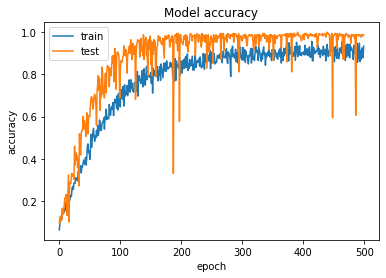

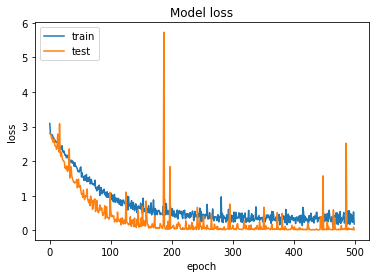

In [17]:
def plot_train_history(history1):
    # Summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # Summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
plot_train_history(history)

In [35]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)


Saving 12.PNG to 12.PNG
12.PNG
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [37]:
import tensorflow as tf

# Load the model.
new_model= tf.keras.models.load_model(filepath="nailss.h5")

# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(new_model)
tflite_model = converter.convert()

# Save the TF Lite model.
with tf.io.gfile.GFile('nailss.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpld9yp_7y/assets


INFO:tensorflow:Assets written to: /tmp/tmpld9yp_7y/assets


In [40]:
!pip install tensorflowjs

     |████████████████████████████████| 71kB 4.5MB/s 
     |████████████████████████████████| 112kB 19.3MB/s 
  Found existing installation: tensorflow-hub 0.12.0
    Uninstalling tensorflow-hub-0.12.0:
      Successfully uninstalled tensorflow-hub-0.12.0


In [43]:
#convert as json
!tensorflowjs_converter --input_format=keras {"nailss.h5"} ./tmp

2021-05-21 07:59:45.201867: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
